In [5]:
# MNIST - CNN
# 16,10:02:18,10:03:56
# 8,10:03:56,10:06:40
# 4,10:06:40,10:11:26
# 2,10:11:26,10:19:20
# 1,10:19:20,10:32:44

# CIFAR - RESNET



import pandas as pd
from datetime import datetime

df = pd.read_csv("times.csv")

df

,Dataset/Model,gpus,start_time,finish_time
0,MNIST/CNN,16,10:02:18,10:03:56
1,MNIST/CNN,8,10:03:56,10:06:40
2,MNIST/CNN,4,10:06:40,10:11:26
3,MNIST/CNN,2,10:11:26,10:19:20
4,MNIST/CNN,1,10:19:20,10:32:44
5,CIFAR-10/ResNet,16,10:44:27,10:50:24
6,CIFAR-10/ResNet,8,10:50:24,11:01:24
7,CIFAR-10/ResNet,4,11:01:24,11:22:53
8,CIFAR-10/ResNet,2,11:22:53,11:57:56
9,CIFAR-10/ResNet,1,12:45:41,13:46:18


In [6]:
secs = []
for start_time, end_time in zip(df["start_time"], df["finish_time"]):
 secs.append((datetime.strptime(end_time, "%H:%M:%S").timestamp() - datetime.strptime(start_time, "%H:%M:%S").timestamp()) / 160)

df["total_time"] = secs
 

([<matplotlib.axis.YTick at 0x7fc73ca8af40>,
 [Text(0, 0.1, '0.1'),
  Text(0, 1.0, '1'),
  Text(0, 10.0, '10'),
  Text(0, 100.0, '100')])

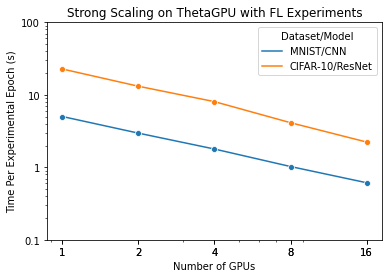

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns


sns.lineplot(
 data=df,
 x="gpus",
 y="total_time",
 # style="shared_sample_ratio",
 hue="Dataset/Model",
 marker='o',
)

plt.xlabel("Number of GPUs")
plt.ylabel("Time Per Experimental Epoch (s)")
plt.title("Strong Scaling on ThetaGPU with FL Experiments")

plt.xscale('log')
plt.yscale('log')

plt.xticks(df["gpus"], df["gpus"])
plt.yticks([0.1, 1, 10, 100], [0.1, 1, 10, 100])